## MuSpAn: Figure 2. Quantification at the cell scale

In this notebook we will reproduce analysis that is used to generate Figure 2 from MuSpAn: A Toolbox for Multiscale Spatial Analysis. This figure focues on spatial analysis at the single cell scale using a spatial transcriptomics sample of healthy mouse colon. See reference paper for details,  https://doi.org/10.1101/2024.12.06.627195.

NOTE: to run this tutorial, you'll need to download the MuSpAn domains from https://github.com/joshwillmoore1/Supporting_material_muspan_paper

In [73]:
# imports for analysis
import muspan as ms 
import numpy as np

# imports to make plots pretty
import seaborn as sns
sns.set_theme(style='white',font_scale=2)
sns.set_style('ticks')
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['figure.dpi'] = 150 # set the resolution of the figure
np.random.seed(42) # Fixed seed for reproducibility

For reproducibility we use the io save-load functionality of muspan to load a premade domain of the sample. (Note this is the same domain as the example dataset 'Xenium-Healthy-Colon', see documentation).

In [38]:
path_to_domains_folder='some/path/to/downloaded_folder/domains_for_figs_2_to_6/' # EDIT THIS PATH TO WHERE THE DOMAIN FILES ARE STORED AFTER DOWNLOADING THEM
domain_path=path_to_domains_folder+'fig-2-domain.muspan'

domain_1 = ms.io.load_domain(path_to_domain=domain_path,print_metadata=True)

MuSpAn domain loaded successfully. Domain summary:
Domain name: Xenium-Healthy-Colon
Number of objects: 74174
Collections: ['Cell boundaries', 'Nucleus boundaries', 'Transcripts']
Labels: ['Cell ID', 'Transcript Counts', 'Cell Area', 'Cluster ID', 'Nucleus Area', 'Transcript', 'Transcript ID'] 
Networks: [] 
Distance matrices: []
version saved with: 1.0.0
Data and time of save: 2024-10-31 16:57:35.490330
Notes: A selected ROI from a sample of healthy colon tissue from a 10x Xenium dataset provided in the public resources repository. The domain contains cell boundaries, nuclei and a selection of transcripts: Mylk, Myl9, Cnn1, Mgll, Mustn1, Oit1, Cldn2, Nupr1, Sox9, Ccl9. The dataset also contains cell clustering labels produced by Xenium Onboard Analysis using the ‘Graph-based’ method. This dataset is licensed under the Creative Commons Attribution license.


Next we'll run some color matching the domain for consistency across the figures and define the transcripts of interest. Note we have only loaded the spatial locations of the transcripts of interest here.

In [39]:
# Color matching the domain for consistency across the figures
# Define the order of cluster IDs
cluster_id_order = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10',
                    'Cluster 11', 'Cluster 12', 'Cluster 13', 'Cluster 14', 'Cluster 15', 'Cluster 16', 'Cluster 17', 'Cluster 18', 'Cluster 19', 'Cluster 20',
                    'Cluster 21', 'Cluster 22', 'Cluster 23', 'Cluster 24', 'Cluster 25', 'Unassigned']

# Initialize an empty list to store colors for each cluster
cell_colors = []

# Assign colors to clusters using seaborn's 'tab20' palette
for i in range(len(cluster_id_order)):
    if i < 10:
        cell_colors.append(sns.color_palette('tab20')[(2 * i) % 20])
    else:
        cell_colors.append(sns.color_palette('tab20')[(2 * (i) - 10 + 1) % 20])

# Create a dictionary to map cluster IDs to their corresponding colors
new_colors = {j: cell_colors[cluster_id_order.index(j)] for j in domain_1.labels['Cluster ID']['categories']}

# Update the domain colors with the new color mapping
domain_1.update_colors(new_colors, colors_to_update='labels', label_name='Cluster ID')

# Defining the transcripts of interest for each cluster
transcripts_of_interest_cluster_2 = ['Oit1', 'Cldn2', 'Nupr1', 'Sox9', 'Ccl9'][::-1]  # Reverse the list for cluster 2
transcripts_of_interest_cluster_1 = ['Mylk', 'Myl9', 'Cnn1', 'Mgll', 'Mustn1']  # List for cluster 1

# Combine the transcripts of interest from both clusters into a single list
total_transcripts_of_interest = transcripts_of_interest_cluster_1 + transcripts_of_interest_cluster_2

The domain constains collections for cell boundaries, their nucelei and transcripts. We'll make some useful queries for these various collections.

In [56]:
# Query to get all cell boundaries in the domain
qCells = ms.query.query(domain_1, ('Collection',), 'is', 'Cell boundaries')

# Query to get all transcripts in the domain
qTrans = ms.query.query(domain_1, ('Collection',), 'is', 'Transcripts')

# Query to get all nucleus boundaries in the domain
qNuc = ms.query.query(domain_1, ('Collection',), 'is', 'Nucleus boundaries')

# Create a query container to combine cell boundaries and transcripts
trans_or_boundaries = ms.query.query_container()

# Add the cell boundaries and transcripts queries to the container using an OR condition
trans_or_boundaries.add_query(qCells, 'OR', qTrans)

Let's visualise the domain to make sure we've loaded everything correctly.

(<Figure size 2100x2250 with 1 Axes>, <Axes: >)

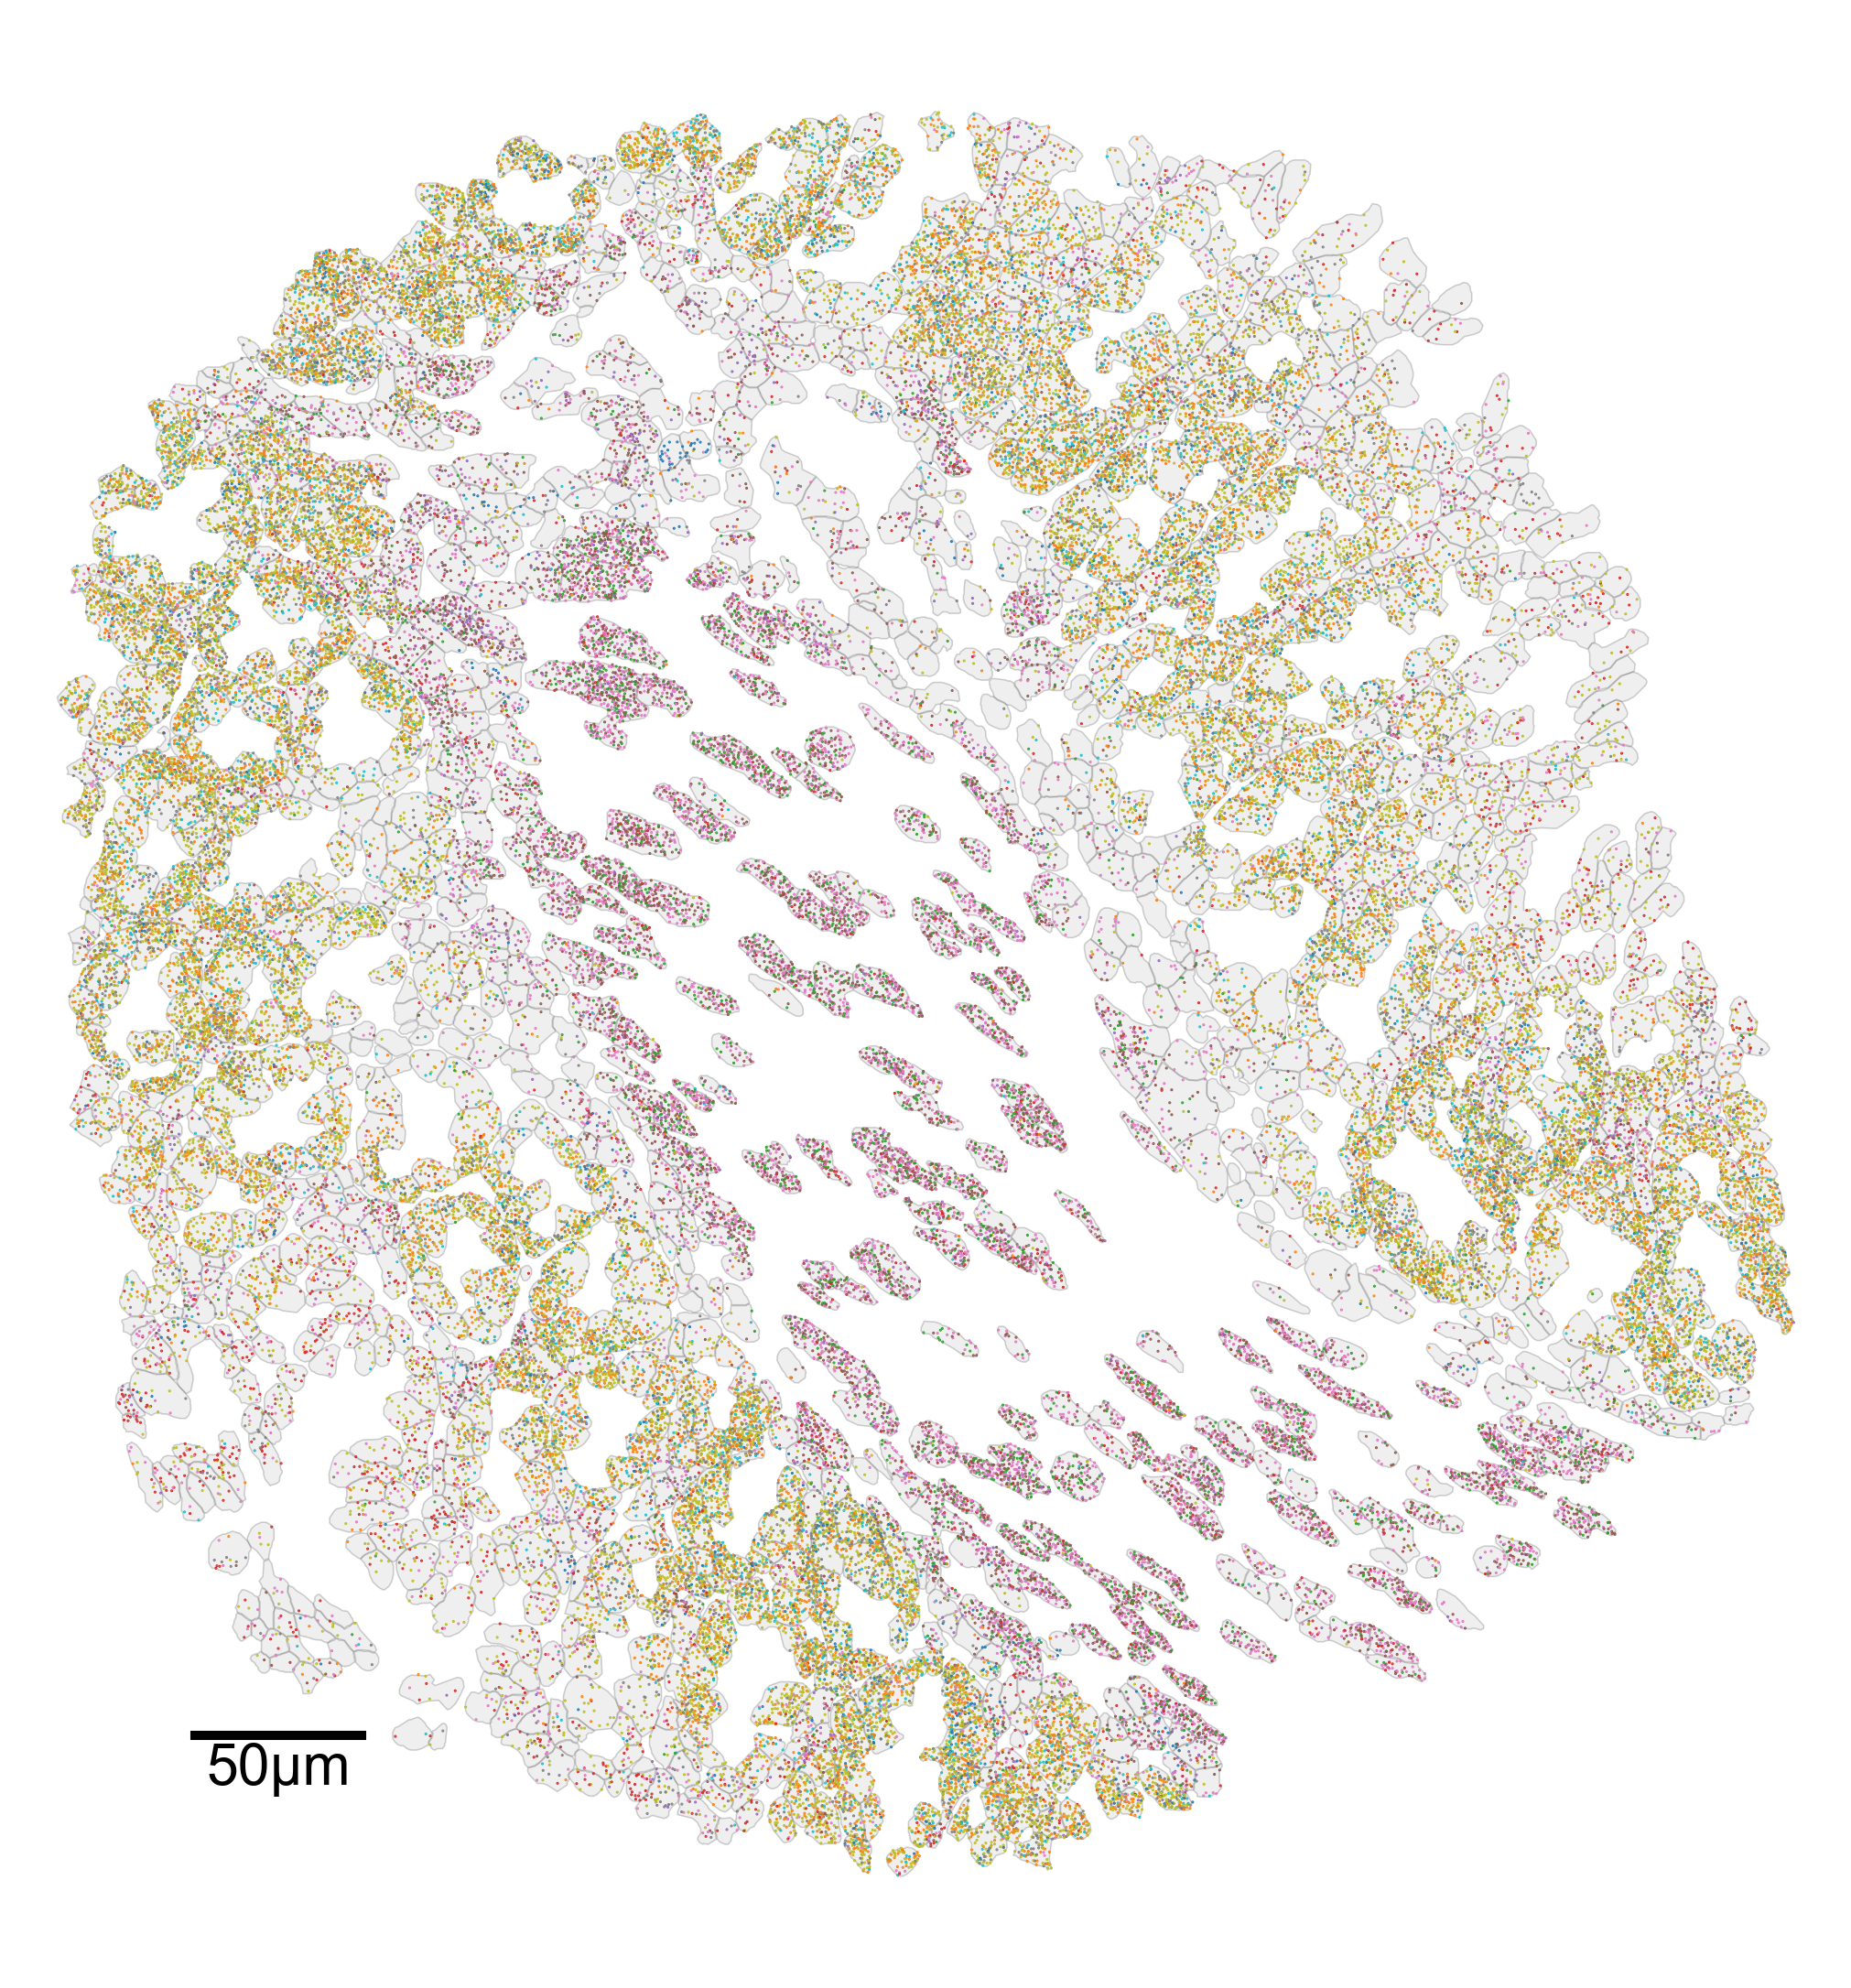

In [57]:
# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(14, 15))

# Visualize the domain with specific settings
ms.visualise.visualise(
    domain_1,
    color_by=('label', 'Transcript'),  # Color by transcript labels
    objects_to_plot=trans_or_boundaries,  # Plot both cell boundaries and transcripts
    show_boundary=False,  # Do not show boundaries
    marker_size=0.25,  # Set marker size for transcripts
    ax=ax,  # Use the created axis for plotting
    add_cbar=False,  # Do not add a color bar
    shape_kwargs={'alpha': 0.2, 'linewidth': 0.75},  # Set transparency and line width for shapes
    cbar_kwargs={'location': 'top'},  # Set color bar location (not used since add_cbar=False)
    add_scalebar=True,  # Add a scale bar to the plot
    scalebar_kwargs={
        'size': 50,  # Set scale bar size to 50µm
        'label': '50µm',  # Label for the scale bar
        'loc': 'lower left',  # Location of the scale bar
        'pad': 3,  # Padding around the scale bar
        'color': 'black',  # Color of the scale bar
        'frameon': False,  # Do not add a frame around the scale bar
        'size_vertical': 2,  # Vertical size of the scale bar
        'fontproperties': fm.FontProperties(size=30)  # Font properties for the scale bar label
    }
)

Now we'll focus on two specific cells that are representative of an stem-like epithelial cell and a stroma-like cell. We'll grab these cells, transcripts and nucleus using the Cell ID provided by 10X Xenium. These cells where located using the 10x Xenium Explorer software.

In [58]:
# Define the cell IDs of interest
a_cell_of_interest_1 = 'njpgodic-1'
a_cell_of_interest_2 = 'dfbfdjho-1'

# Create queries to select the cells of interest based on their IDs
candiate_cell_query_1 = ms.query.query(domain_1, ('label', 'Cell ID'), 'is', a_cell_of_interest_1)
candiate_cell_query_2 = ms.query.query(domain_1, ('label', 'Cell ID'), 'is', a_cell_of_interest_2)

# Combine the queries for both cells of interest using an OR condition
qBothCandiates = ms.query.query_container()
qBothCandiates.add_query(candiate_cell_query_1, 'OR', candiate_cell_query_2)

# Create a query container to get the boundaries of both cells of interest
qBothCandiates_boundaries = ms.query.query_container()
qBothCandiates_boundaries.add_query(qBothCandiates, 'AND', qCells)

# Create query containers for the boundaries, nuclei, and transcripts of each cell of interest
Boundary_in_1 = ms.query.query_container()
Boundary_in_1.add_query(candiate_cell_query_1, 'AND', qCells)

Nucleus_in_1 = ms.query.query_container()
Nucleus_in_1.add_query(candiate_cell_query_1, 'AND', qNuc)

trans_in_1 = ms.query.query_container()
trans_in_1.add_query(candiate_cell_query_1, 'AND', qTrans)

Boundary_in_2 = ms.query.query_container()
Boundary_in_2.add_query(candiate_cell_query_2, 'AND', qCells)

Nucleus_in_2 = ms.query.query_container()
Nucleus_in_2.add_query(candiate_cell_query_2, 'AND', qNuc)

trans_in_2 = ms.query.query_container()
trans_in_2.add_query(candiate_cell_query_2, 'AND', qTrans)

We can count the number of transcripts in the cell boundary and nucleus of the cells of interest explicitly using our summary statistics module. We include some additional code to align these transcript counts for plotting later on.

In [59]:
# Count the number of transcripts within the cell boundary for cell 1
# 'label_name' specifies the label to count, 'population' specifies the query container for transcripts,
# 'include_boundaries' specifies the query container for cell boundaries, and 'normalised' specifies whether to normalize the counts
counts_in_boundary_1, unique_labels_1 = ms.summary_statistics.label_counts(
    domain_1, label_name='Transcript ID', population=trans_in_1, include_boundaries=Boundary_in_1, normalised=False)

# Count the number of transcripts within the nucleus for cell 1
counts_in_nuc_1, unique_labels_nuc_1 = ms.summary_statistics.label_counts(
    domain_1, label_name='Transcript ID', population=trans_in_1, include_boundaries=Nucleus_in_1, normalised=False)

# Count the number of transcripts within the cell boundary for cell 2
counts_in_boundary_2, unique_labels_2 = ms.summary_statistics.label_counts(
    domain_1, label_name='Transcript ID', population=trans_in_2, include_boundaries=Boundary_in_2, normalised=False)

# Count the number of transcripts within the nucleus for cell 2
counts_in_nuc_2, unique_labels_nuc_2 = ms.summary_statistics.label_counts(
    domain_1, label_name='Transcript ID', population=trans_in_2, include_boundaries=Nucleus_in_2, normalised=False)

In [60]:
# Initialize empty lists to store the counts of transcripts in the cell boundary and nucleus for both cells
counts_in_boundary_1_full = []
counts_in_nuc_1_full = []
counts_in_boundary_2_full = []
counts_in_nuc_2_full = []

# Iterate over each transcript of interest
for t in total_transcripts_of_interest:
    # Check if the transcript is in the unique labels for cell boundary 1 and append the count, otherwise append 0
    if t in unique_labels_1:
        counts_in_boundary_1_full.append(counts_in_boundary_1[list(unique_labels_1).index(t)])
    else:
        counts_in_boundary_1_full.append(0)
        
    # Check if the transcript is in the unique labels for nucleus 1 and append the count, otherwise append 0
    if t in unique_labels_nuc_1:
        counts_in_nuc_1_full.append(counts_in_nuc_1[list(unique_labels_nuc_1).index(t)])
    else:
        counts_in_nuc_1_full.append(0) 
        
    # Check if the transcript is in the unique labels for cell boundary 2 and append the count, otherwise append 0
    if t in unique_labels_2:
        counts_in_boundary_2_full.append(counts_in_boundary_2[list(unique_labels_2).index(t)])
    else:
        counts_in_boundary_2_full.append(0)
    
    # Check if the transcript is in the unique labels for nucleus 2 and append the count, otherwise append 0
    if t in unique_labels_nuc_2:
        counts_in_nuc_2_full.append(counts_in_nuc_2[list(unique_labels_nuc_2).index(t)])
    else:
        counts_in_nuc_2_full.append(0)
        
# Convert the lists to numpy arrays for easier manipulation later
counts_in_boundary_1_full = np.array(counts_in_boundary_1_full)
counts_in_nuc_1_full = np.array(counts_in_nuc_1_full)
counts_in_boundary_2_full = np.array(counts_in_boundary_2_full)
counts_in_nuc_2_full = np.array(counts_in_nuc_2_full)

We might also be interested in the distance between particular objects, for example, we show here that we can compute the distance of these transcripts located within the cells of interest to their respective nuclei as a proof of principle.

In [61]:
# Initialize empty lists to store distances of transcripts to the nucleus for both cells
distance_dist_in_1 = []
distance_dist_in_2 = []

# Iterate over each transcript of interest
for t_id in total_transcripts_of_interest:
    # Create a query to select the current transcript of interest
    qToI = ms.query.query(domain_1, ('label', 'Transcript ID'), 'is', t_id)
    
    # Create query containers to combine the transcript query with the cell-specific transcript queries
    ToI_in_1 = ms.query.query_container()
    ToI_in_1.add_query(trans_in_1, 'AND', qToI)
    
    ToI_in_2 = ms.query.query_container()
    ToI_in_2.add_query(trans_in_2, 'AND', qToI)
    
    # Get the object IDs of the transcripts in each cell
    ids_1 = ms.query.return_object_IDs_from_query_like(domain_1, ToI_in_1)
    ids_2 = ms.query.return_object_IDs_from_query_like(domain_1, ToI_in_2)
    
    # If there are transcripts in cell 1, calculate the distances to the nucleus
    if len(ids_1) > 0:
        these_dists_1, _, _, _, _ = ms.query.get_minimum_distances_boundaries(domain_1, ToI_in_1, Nucleus_in_1)
        contains_array_1, _, _ = ms.query.is_A_contained_by_B(domain_1, ToI_in_1, Nucleus_in_1)
        these_dists_1[contains_array_1.astype(int)] = 0  # Set distance to 0 if the transcript is inside the nucleus
    else:
        these_dists_1 = []
    
    # If there are transcripts in cell 2, calculate the distances to the nucleus
    if len(ids_2) > 0:
        these_dists_2, _, _, _, _ = ms.query.get_minimum_distances_boundaries(domain_1, ToI_in_2, Nucleus_in_2)
        contains_array_2, _, _ = ms.query.is_A_contained_by_B(domain_1, ToI_in_2, Nucleus_in_2)
        these_dists_2[contains_array_2] = 0  # Set distance to 0 if the transcript is inside the nucleus
    else:
        these_dists_2 = []
    
    # Append the distances to the respective lists
    distance_dist_in_1.append(these_dists_1)
    distance_dist_in_2.append(these_dists_2)

In addition, geometric measurements can be computed to quantify the shape of these cells.

In [62]:
# Calculate the circularity of the cell boundary for cell 1
# 'population' specifies the query container for cell boundaries
# 'add_as_label' specifies whether to add the calculated circularity as a label to the domain
circularity_1, _ = ms.geometry.circularity(domain_1, population=Boundary_in_1, add_as_label=False)

# Calculate the area of the cell boundary for cell 1
area_1, _ = ms.geometry.area(domain_1, population=Boundary_in_1, add_as_label=False)

# Calculate the perimeter of the cell boundary for cell 1
perimeter_1, _ = ms.geometry.perimeter(domain_1, population=Boundary_in_1, add_as_label=False)

# Calculate the principal axis angle of the cell boundary for cell 1
principle_axis_angle_1, _, _ = ms.geometry.principle_axis(domain_1, population=Boundary_in_1, add_as_label=False)

# Print the calculated geometric properties for cell 1
print('Circularity for cell 1 = ', circularity_1)
print('Area for cell 1 = ', area_1)
print('Perimeter for cell 1 = ', perimeter_1)
print('Principal angle for cell 1 = ', principle_axis_angle_1)

Circularity for cell 1 =  [0.5932872574255229]
Area for cell 1 =  [97.19690859]
Perimeter for cell 1 =  [45.37312042]
Principal angle for cell 1 =  [-0.3848883949941565]


In [63]:
# Calculate the circularity of the cell boundary for cell 2
# 'population' specifies the query container for cell boundaries
# 'add_as_label' specifies whether to add the calculated circularity as a label to the domain
circularity_2, _ = ms.geometry.circularity(domain_1, population=Boundary_in_2, add_as_label=False)

# Calculate the area of the cell boundary for cell 2
area_2, _ = ms.geometry.area(domain_1, population=Boundary_in_2, add_as_label=False)

# Calculate the perimeter of the cell boundary for cell 2
perimeter_2, _ = ms.geometry.perimeter(domain_1, population=Boundary_in_2, add_as_label=False)

# Calculate the principal axis angle of the cell boundary for cell 2
principle_axis_angle_2, _, _ = ms.geometry.principle_axis(domain_1, population=Boundary_in_2, add_as_label=False)

# Print the calculated geometric properties for cell 2
print('Circularity for cell 2 = ', circularity_2)
print('Area for cell 2 = ', area_2)
print('Perimeter for cell 2 = ', perimeter_2)
print('Principal angle for cell 2 = ', principle_axis_angle_2)

Circularity for cell 2 =  [0.8238108884000424]
Area for cell 2 =  [81.03333941]
Perimeter for cell 2 =  [35.1579089]
Principal angle for cell 2 =  [-0.9417514930571387]


Let's plot what these results look like for our cells of interest.

(-0.1, 4.0)

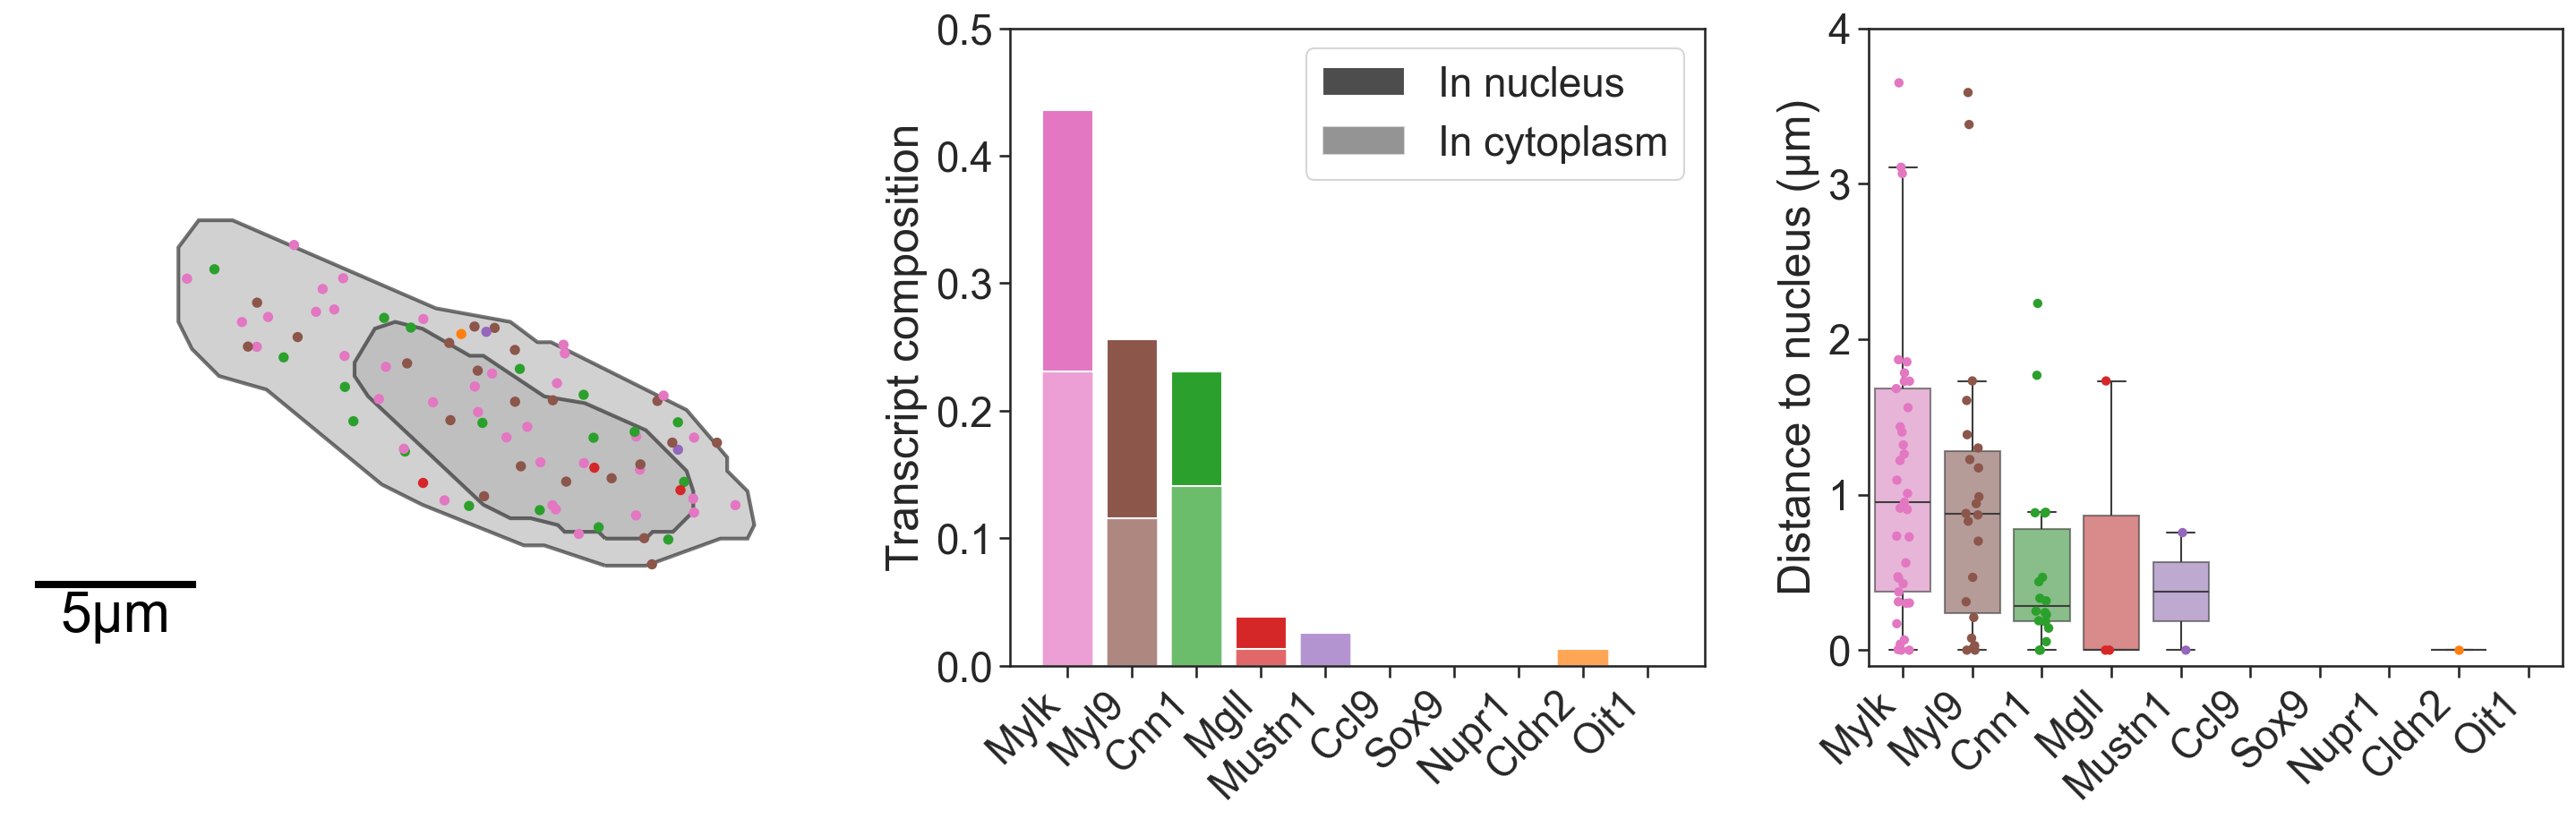

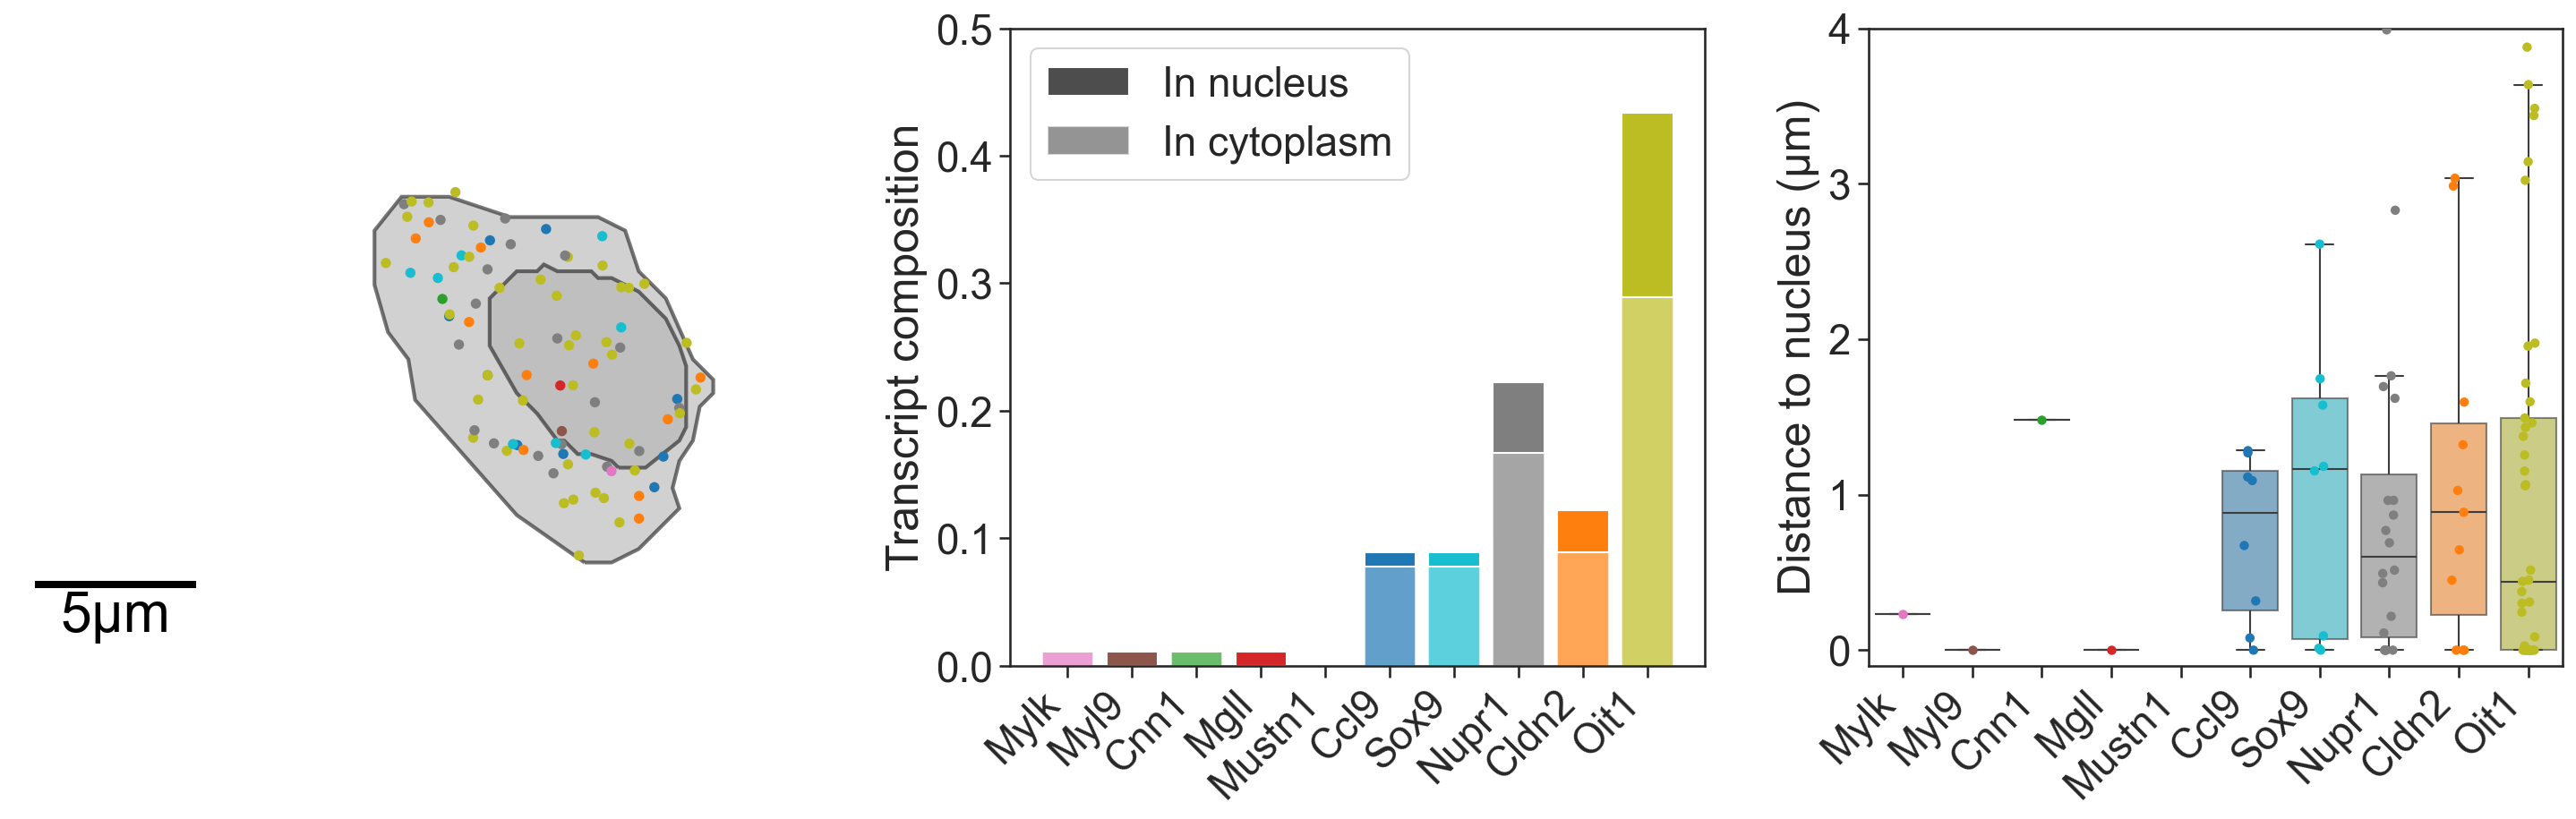

In [48]:
# Define the colors for the bar plots based on the transcript IDs
barcolors = [domain_1.colors['labels']['Transcript ID']['nameToColor'][c] for c in total_transcripts_of_interest]

# Create a figure with 3 subplots arranged in a single row
fig, ax = plt.subplots(figsize=(20, 6), nrows=1, ncols=3, gridspec_kw={'width_ratios': [1.2, 1, 1]})

# Visualize the first candidate cell with transcripts colored by their IDs
ms.visualise.visualise(
    domain_1,
    objects_to_plot=candiate_cell_query_1,
    color_by=('label', 'Transcript ID'),
    ax=ax[0],
    add_cbar=False,
    shape_kwargs={'linewidth': 2},
    add_scalebar=True,
    scalebar_kwargs={
        'size': 5,
        'label': '5µm',
        'loc': 'lower left',
        'pad': 0.3,
        'color': 'black',
        'frameon': False,
        'size_vertical': 0.15,
        'fontproperties': fm.FontProperties(size=30)
    }
)
# Set the limits for the y and x axes for the first subplot
ax[0].set_ylim(4120, 4140)
ax[0].set_xlim(1630, 1660)

# Create bar plots for the transcript composition in the first candidate cell
# Initialize bars for nucleus and cytoplasm with placeholder values
ax[1].bar(total_transcripts_of_interest, [-1]*len(total_transcripts_of_interest), color=[0.3, 0.3, 0.3, 1], alpha=1, label='In nucleus')
ax[1].bar(total_transcripts_of_interest, [-1]*len(total_transcripts_of_interest), color=[0.3, 0.3, 0.3, 1], alpha=0.6, label='In cytoplasm')

# Plot the actual transcript counts in the cytoplasm and nucleus
ax[1].bar(total_transcripts_of_interest, (counts_in_boundary_1_full - counts_in_nuc_1_full)/np.sum(counts_in_boundary_1_full), color=barcolors, alpha=0.7)
ax[1].bar(total_transcripts_of_interest, counts_in_nuc_1_full/np.sum(counts_in_boundary_1_full), bottom=(counts_in_boundary_1_full - counts_in_nuc_1_full)/np.sum(counts_in_boundary_1), color=barcolors)
ax[1].set_xticklabels(total_transcripts_of_interest, rotation=45, ha='right')
ax[1].set_ylabel('Transcript composition')
ax[1].legend()
ax[1].set_ylim(0, 0.5)

# Create a boxplot and strip plot for the distances of transcripts to the nucleus in the first candidate cell
sns.boxplot(data=distance_dist_in_1, ax=ax[2], palette=barcolors, showfliers=False, saturation=0.75, boxprops={'alpha': 0.6})
sns.stripplot(data=distance_dist_in_1, ax=ax[2], palette=barcolors)
ax[2].set_xticklabels(total_transcripts_of_interest, rotation=45, ha='right')
ax[2].set_ylabel('Distance to nucleus (µm)')
ax[2].set_ylim(-0.1, 4)

# Create another figure with 3 subplots arranged in a single row for the second candidate cell
fig, ax = plt.subplots(figsize=(20, 6), nrows=1, ncols=3, gridspec_kw={'width_ratios': [1.2, 1, 1]})

# Visualize the second candidate cell with transcripts colored by their IDs
ms.visualise.visualise(
    domain_1,
    objects_to_plot=candiate_cell_query_2,
    color_by=('label', 'Transcript ID'),
    ax=ax[0],
    add_cbar=False,
    shape_kwargs={'linewidth': 2},
    add_scalebar=True,
    scalebar_kwargs={
        'size': 5,
        'label': '5µm',
        'loc': 'lower left',
        'pad': 0.3,
        'color': 'black',
        'frameon': False,
        'size_vertical': 0.15,
        'fontproperties': fm.FontProperties(size=30)
    }
)
# Set the limits for the y and x axes for the first subplot
ax[0].set_ylim(4057, 4077)
ax[0].set_xlim(1572, 1602)

# Create bar plots for the transcript composition in the second candidate cell
# Initialize bars for nucleus and cytoplasm with placeholder values
ax[1].bar(total_transcripts_of_interest, [-1]*len(total_transcripts_of_interest), color=[0.3, 0.3, 0.3, 1], alpha=1, label='In nucleus')
ax[1].bar(total_transcripts_of_interest, [-1]*len(total_transcripts_of_interest), color=[0.3, 0.3, 0.3, 1], alpha=0.6, label='In cytoplasm')

# Plot the actual transcript counts in the cytoplasm and nucleus
ax[1].bar(total_transcripts_of_interest, (counts_in_boundary_2_full - counts_in_nuc_2_full)/np.sum(counts_in_boundary_2_full), color=barcolors, alpha=0.7)
ax[1].bar(total_transcripts_of_interest, counts_in_nuc_2_full/np.sum(counts_in_boundary_2_full), bottom=(counts_in_boundary_2_full - counts_in_nuc_2_full)/np.sum(counts_in_boundary_2), color=barcolors)
ax[1].set_xticklabels(total_transcripts_of_interest, rotation=45, ha='right')
ax[1].set_ylabel('Transcript composition')
ax[1].legend()
ax[1].set_ylim(0, 0.5)

# Create a boxplot and strip plot for the distances of transcripts to the nucleus in the second candidate cell
sns.boxplot(data=distance_dist_in_2, ax=ax[2], palette=barcolors, showfliers=False, saturation=0.75, boxprops={'alpha': 0.6})
sns.stripplot(data=distance_dist_in_2, ax=ax[2], palette=barcolors)
ax[2].set_xticklabels(total_transcripts_of_interest, rotation=45, ha='right')
ax[2].set_ylabel('Distance to nucleus (µm)')
ax[2].set_ylim(-0.1, 4)


The following code repeates this analysis conducted on the two cells of interest but for all cells in Celltype 1 and Celltype 2 in our ROI.

In [64]:
# Define the clusters of interest
clusters_of_interest = ['Cluster 1', 'Cluster 2']

# Initialize lists to store results for each cluster
transcript_counts_matrices = []
cell_cicularities = []
cell_areas = []
cell_perimeters = []
cell_orientations = []

# Loop through each cluster of interest
for cluster in clusters_of_interest:
    # Create a query to select cells belonging to the current cluster
    cluster_query = ms.query.query(domain_1, ('label', 'Cluster ID'), 'is', cluster)
    
    # Query to get all cell boundaries in the domain
    qCells = ms.query.query(domain_1, ('Collection',), 'is', 'Cell boundaries')
    
    # Create a query container to combine the cluster query and cell boundaries query
    cells_boundaries_this_cluster = ms.query.query_container()
    cells_boundaries_this_cluster.add_query(cluster_query, 'AND', qCells)
    
    # Calculate geometric properties for cells in the current cluster
    circularity, _ = ms.geometry.circularity(domain_1, population=cells_boundaries_this_cluster, add_as_label=True, label_name='Circularity', cmap='viridis')
    area, _ = ms.geometry.area(domain_1, population=cells_boundaries_this_cluster, add_as_label=True, label_name='Area (µm$^2$)', cmap='inferno')
    perimeter, _ = ms.geometry.perimeter(domain_1, population=cells_boundaries_this_cluster, add_as_label=True, label_name='Perimeter (µm)', cmap='cividis')
    principle_axis_angle, _, _ = ms.geometry.principle_axis(domain_1, population=cells_boundaries_this_cluster, add_as_label=True, label_name='Principal angle (rad)', cmap='coolwarm')
    
    # Append the calculated properties to the respective lists
    cell_cicularities.append(circularity)
    cell_areas.append(area)
    cell_perimeters.append(perimeter)
    cell_orientations.append(principle_axis_angle)
    
    # Get cell IDs for the current cluster
    cell_ids_in_cluster = domain_1.labels['Cell ID']['labels'][ms.query.interpret_query(cluster_query)]
    
    # Initialize a matrix to store transcript counts for each cell in the cluster
    this_count_matrix = np.zeros((len(cell_ids_in_cluster), len(total_transcripts_of_interest)))
    
    # Loop through each cell ID in the current cluster
    for i, cell_id in enumerate(cell_ids_in_cluster):
        # Create a query to select the current cell
        candiate_cell_query_1 = ms.query.query(domain_1, ('label', 'Cell ID'), 'is', cell_id)
        
        # Create query containers for the cell boundary, nucleus, and transcripts
        Boundary_in_1 = ms.query.query_container()
        Boundary_in_1.add_query(candiate_cell_query_1, 'AND', qCells)

        Nucleus_in_1 = ms.query.query_container()
        Nucleus_in_1.add_query(candiate_cell_query_1, 'AND', qNuc)

        trans_in_1 = ms.query.query_container()
        trans_in_1.add_query(candiate_cell_query_1, 'AND', qTrans)
                
        # Count the number of transcripts within the cell boundary
        counts_in_boundary_1, unique_labels_1 = ms.summary_statistics.label_counts(domain_1, label_name='Transcript ID', population=trans_in_1, include_boundaries=Boundary_in_1, normalised=True)
        
        # Initialize a list to store the counts of transcripts of interest
        counts_in_boundary_1_full = []

        # Loop through each transcript of interest
        for t in total_transcripts_of_interest:
            # Append the count of the transcript if it is present, otherwise append 0
            if t in unique_labels_1:
                counts_in_boundary_1_full.append(counts_in_boundary_1[list(unique_labels_1).index(t)])
            else:
                counts_in_boundary_1_full.append(0)
          
        # Store the counts in the matrix
        this_count_matrix[i, :] = np.asarray(counts_in_boundary_1_full)
    
    # Append the count matrix for the current cluster to the list
    transcript_counts_matrices.append(this_count_matrix)

Non-parametric significance testing of distributions

In [65]:
from scipy.stats import ranksums

# Perform Wilcoxon rank-sum test for cell areas between the two clusters
cell_area_stat, cell_area_p = ranksums(cell_areas[0], cell_areas[1])

# Perform Wilcoxon rank-sum test for cell perimeters between the two clusters
cell_perimeters_stat, cell_perimeters_p = ranksums(cell_perimeters[0], cell_perimeters[1])

# Perform Wilcoxon rank-sum test for cell circularity between the two clusters
cell_circularity_stat, cell_circularity_p = ranksums(cell_cicularities[0], cell_cicularities[1])

# Perform Wilcoxon rank-sum test for cell orientation between the two clusters
cell_orientation_stat, cell_orientation_p = ranksums(cell_orientations[0], cell_orientations[1])

# Print the results of the Wilcoxon rank-sum tests
print('Cell area Wilcoxon rank-sum test  = ', cell_area_stat, ' p = ', cell_area_p)
print('Cell perimeter Wilcoxon rank-sum test  = ', cell_perimeters_stat, ' p = ', cell_perimeters_p)
print('Cell circularity Wilcoxon rank-sum test  = ', cell_circularity_stat, ' p = ', cell_circularity_p)
print('Cell orientation Wilcoxon rank-sum test  = ', cell_orientation_stat, ' p = ', cell_orientation_p)

Cell area Wilcoxon rank-sum test  =  1.109433328455054  p =  0.26724329130512015
Cell perimeter Wilcoxon rank-sum test  =  5.271805609720655  p =  1.3508811560914527e-07
Cell circularity Wilcoxon rank-sum test  =  -11.666359878290686  p =  1.8935315508921308e-31
Cell orientation Wilcoxon rank-sum test  =  -6.047290451886069  p =  1.473020640087687e-09


In [67]:
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import cm

# Combine transcript count matrices from both clusters into a single array
all_data = np.vstack([transcript_counts_matrices[0], transcript_counts_matrices[1]])

# Create a list of transcript names repeated for each cell
x_transcripts = total_transcripts_of_interest * len(all_data[:, 0])

# Initialize an empty list to store the flattened data
this_data = []

# Flatten the all_data array and extend the this_data list with the values
for i in range(len(all_data[:, 0])):
    this_data.extend(all_data[i, :])

# Flatten the all_data array
all_data = all_data.flatten()

# Create group labels for each cell type
group_labels = ['Celltype 1'] * np.shape(transcript_counts_matrices[0])[0] * np.shape(transcript_counts_matrices[0])[1] + \
               ['Celltype 2'] * np.shape(transcript_counts_matrices[1])[0] * np.shape(transcript_counts_matrices[1])[1]

# Create simple group labels for each cell type
group_labels_simple = ['Celltype 1'] * len(cell_areas[0]) + ['Celltype 2'] * len(cell_areas[1])

# Concatenate cell areas, perimeters, circularities, and orientations from both clusters
this_area = np.concatenate(cell_areas)
this_perimeter = np.concatenate(cell_perimeters)
this_circr = np.concatenate(cell_cicularities)
thos_ori = np.concatenate(cell_orientations)

# Create a query to select cells belonging to the clusters of interest
cluster_of_interest_query = ms.query.query(domain_1, ('label', 'Cluster ID'), 'in', clusters_of_interest)

Transcripts in Celltypes 1 and 2

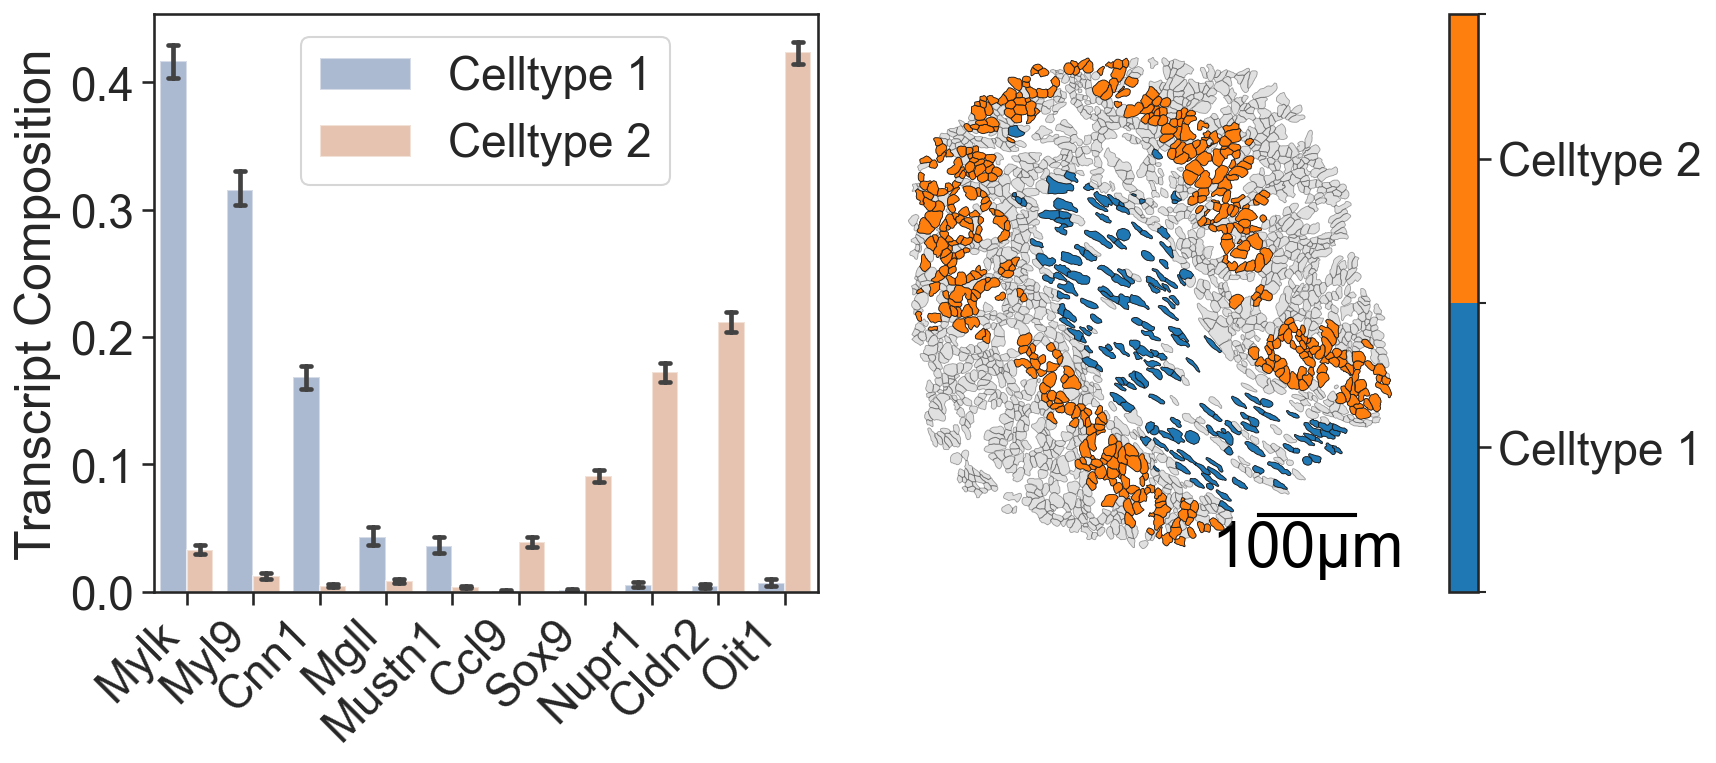

In [68]:
# Set the color palette for the plots
sns.set_palette("deep")

# Create a figure with 2 subplots arranged in a single row
fig, ax = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.1})

# Create a bar plot for transcript composition
# x_transcripts: list of transcript names
# this_data: list of transcript counts
# group_labels: list of group labels for each transcript
sns.barplot(x=x_transcripts, y=this_data, hue=group_labels, capsize=0.3, ax=ax[0], legend=True, alpha=0.5)

# Set x-axis ticks and labels for the bar plot
ax[0].set_xticks(np.arange(0, 10, 1))
ax[0].set_xticklabels(total_transcripts_of_interest, rotation=45, ha='right')
ax[0].set_ylabel('Transcript Composition')

# Visualize the domain with cell boundaries and transcripts
ms.visualise.visualise(domain_1, color_by=('label', 'Transcript ID'), objects_to_plot=qCells, ax=ax[1], add_cbar=False, shape_kwargs={'alpha': 0.4, 'linewidth': 0.4})

# Visualize the domain with cluster IDs
ms.visualise.visualise(domain_1, color_by=('label', 'Cluster ID'), objects_to_plot=cluster_of_interest_query, ax=ax[1], add_cbar=False, shape_kwargs={'linewidth': 0.4, 'alpha': 1},
                       add_scalebar=True, scalebar_kwargs={'size': 100, 'label': '100µm', 'loc': 'lower right', 'pad': 0.1, 'color': 'black', 'frameon': False, 'size_vertical': 2, 'fontproperties': fm.FontProperties(size=30)})

# Define the colors for the clusters of interest
cluster_colors = [domain_1.colors['labels']['Cluster ID']['nameToColor'][c] for c in clusters_of_interest]

# Create a colormap and normalization for the color bar
cmap = ListedColormap(cluster_colors[:2])
norm = BoundaryNorm([0, .5, 1], cmap.N)

# Add a color bar to the plot
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax[1])
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(['Celltype 1', 'Celltype 2'])

(<Figure size 1800x750 with 3 Axes>, <Axes: >)

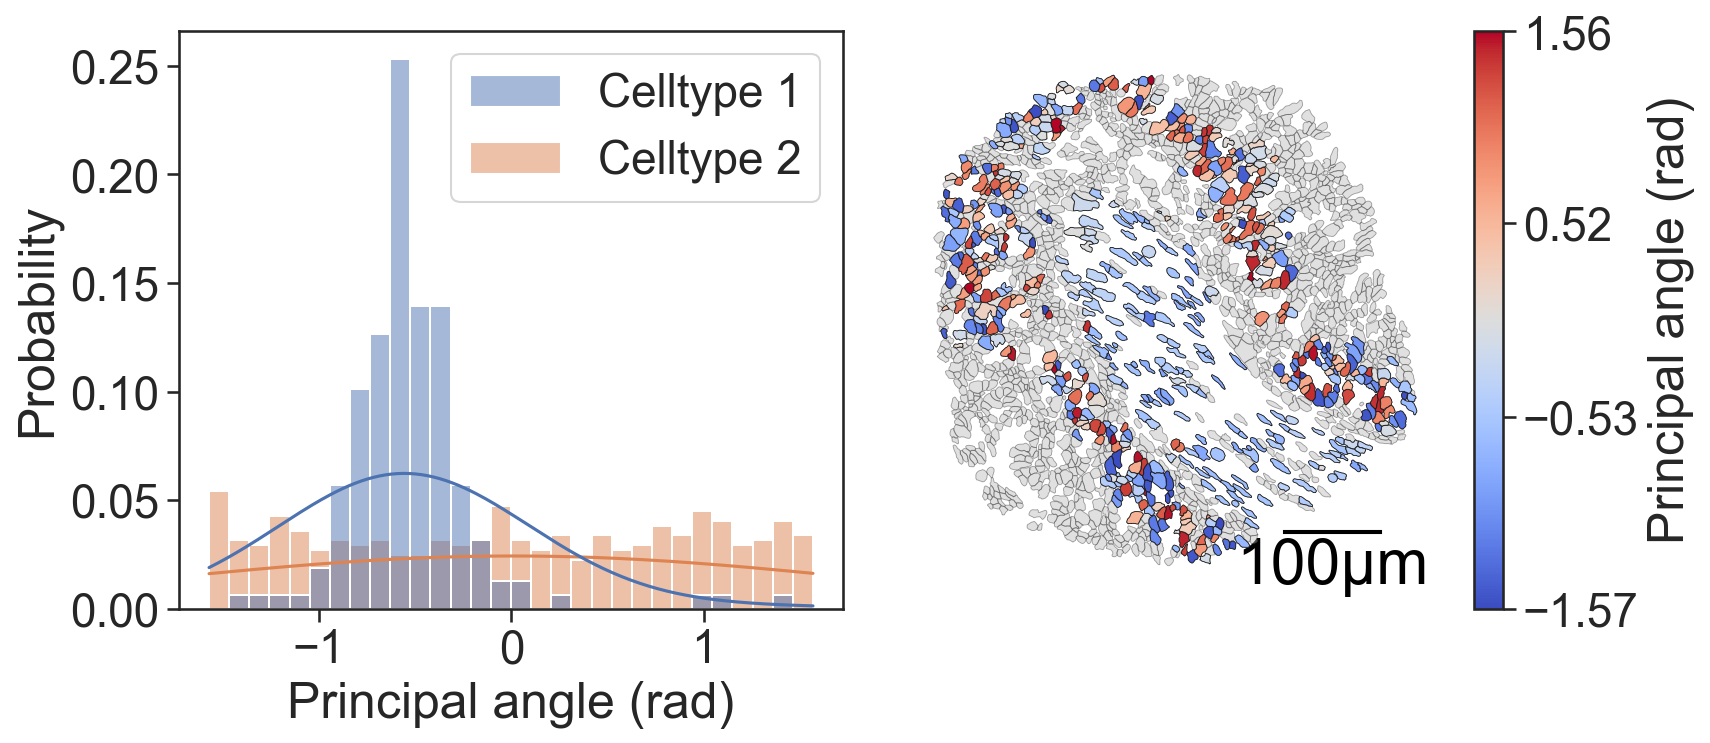

In [69]:
# Create a figure with 2 subplots arranged in a single row
fig, ax = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.1})

# Plot a histogram of the principal axis angles (orientations) for the cells
sns.histplot(x=thos_ori, hue=group_labels_simple, fill=True, ax=ax[0], kde=True, kde_kws={'bw_adjust': 5, 'clip': [-np.pi, np.pi]}, legend=True, bins=30, stat='probability', common_norm=False)
ax[0].set_xlabel("Principal angle (rad)")  # Set the x-axis label
ax[0].set_ylabel("Probability")  # Set the y-axis label

# Visualize the domain with cell boundaries and transcripts
ms.visualise.visualise(domain_1, color_by=('label', 'Transcript ID'), objects_to_plot=qCells, ax=ax[1], add_cbar=False, shape_kwargs={'alpha': 0.4, 'linewidth': 0.4})

# Visualize the domain with principal axis angles
ms.visualise.visualise(domain_1, color_by=('label', 'Principal angle (rad)'), objects_to_plot=cluster_of_interest_query, ax=ax[1], add_cbar=True, shape_kwargs={'linewidth': 0.4, 'alpha': 1},
                       add_scalebar=True, scalebar_kwargs={'size': 100, 'label': '100µm', 'loc': 'lower right', 'pad': 0.1, 'color': 'black', 'frameon': False, 'size_vertical': 2, 'fontproperties': fm.FontProperties(size=30)})

(<Figure size 1800x750 with 3 Axes>, <Axes: >)

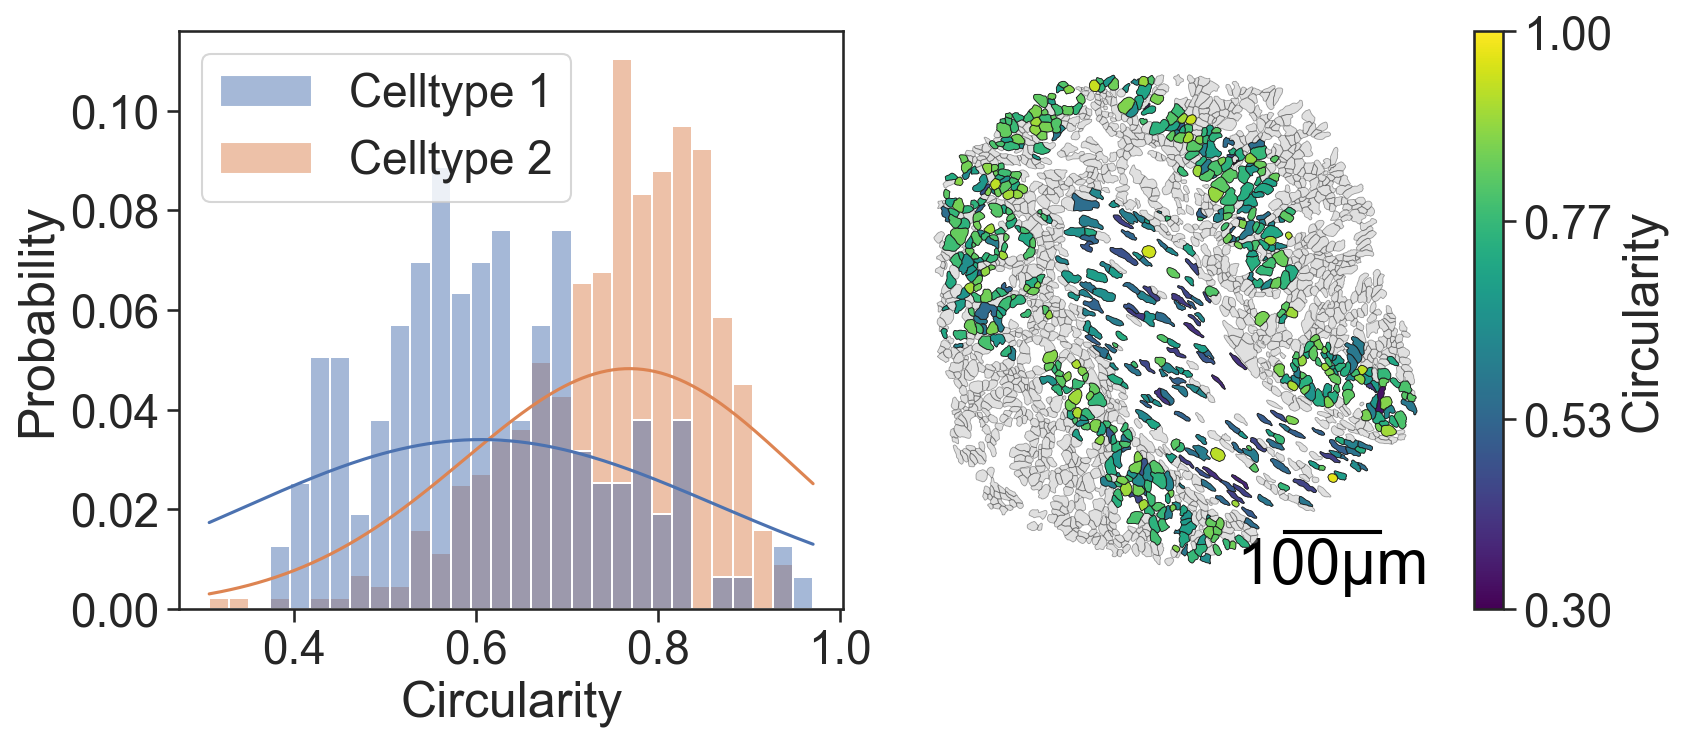

In [70]:
# Create a figure with 2 subplots arranged in a single row
fig, ax = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.1})

# Plot a histogram of the circularity for the cells
sns.histplot(x=this_circr, hue=group_labels_simple, fill=True, ax=ax[0], kde=True, kde_kws={'bw_adjust': 5, 'clip': [0, 1]}, legend=True, bins=30, stat='probability', common_norm=False)
ax[0].set_xlabel("Circularity")  # Set the x-axis label
ax[0].set_ylabel("Probability")  # Set the y-axis label

# Visualize the domain with cell boundaries and transcripts
ms.visualise.visualise(domain_1, color_by=('label', 'Transcript ID'), objects_to_plot=qCells, ax=ax[1], add_cbar=False, shape_kwargs={'alpha': 0.4, 'linewidth': 0.4})

# Visualize the domain with circularity values
ms.visualise.visualise(domain_1, color_by=('label', 'Circularity'), objects_to_plot=cluster_of_interest_query, ax=ax[1], add_cbar=True, vmin=0.3, vmax=1, shape_kwargs={'linewidth': 0.4, 'alpha': 1},
                       add_scalebar=True, scalebar_kwargs={'size': 100, 'label': '100µm', 'loc': 'lower right', 'pad': 0.1, 'color': 'black', 'frameon': False, 'size_vertical': 2, 'fontproperties': fm.FontProperties(size=30)})

(<Figure size 1800x750 with 3 Axes>, <Axes: >)

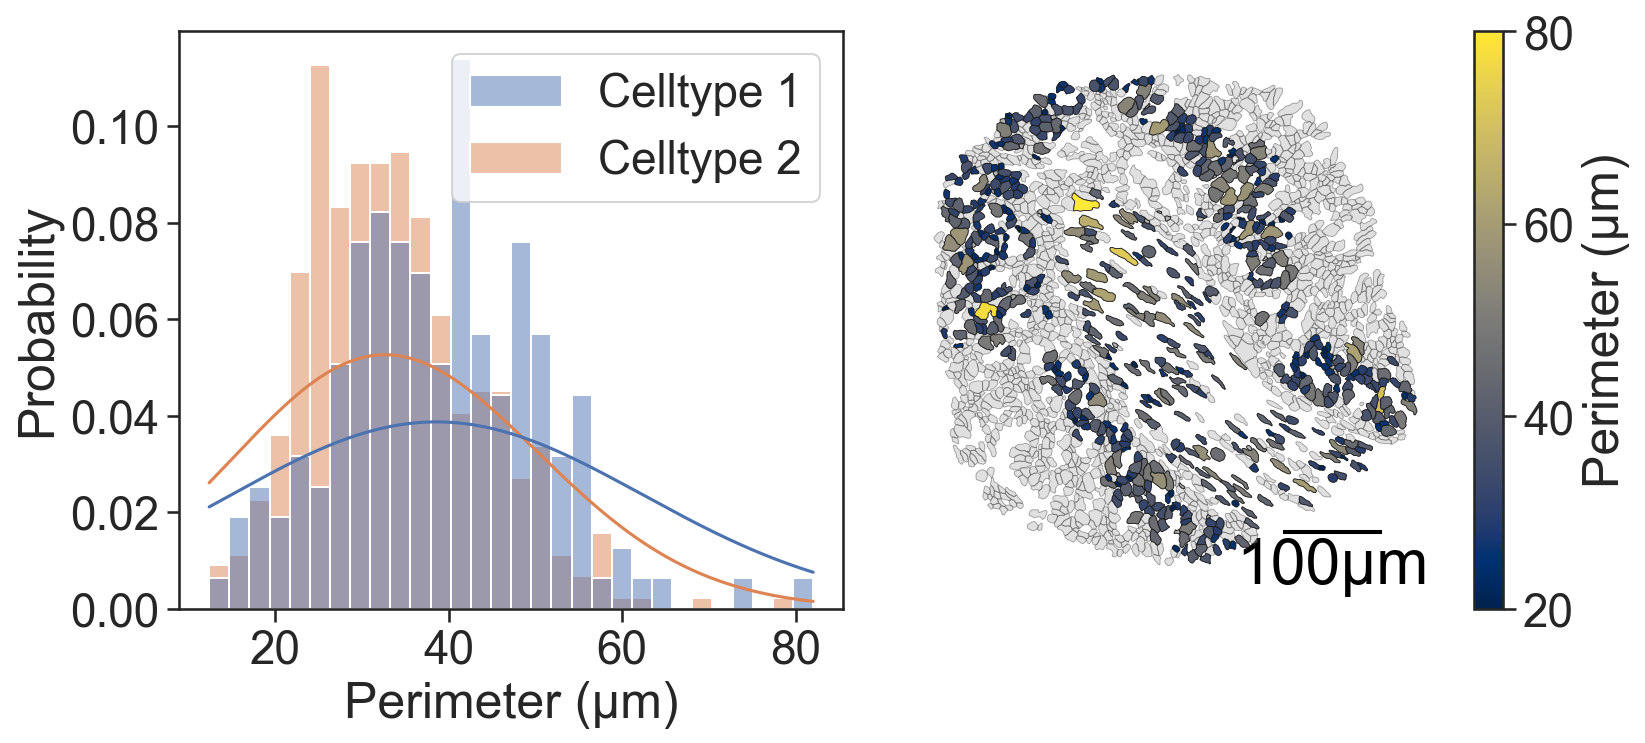

In [71]:
# Create a figure with 2 subplots arranged in a single row
fig, ax = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.1})

# Plot a histogram of the cell perimeters for the cells
sns.histplot(x=this_perimeter, hue=group_labels_simple, fill=True, ax=ax[0], kde=True, kde_kws={'bw_adjust': 5, 'clip': [0, np.infty]}, legend=True, bins=30, stat='probability', common_norm=False)
ax[0].set_xlabel("Perimeter (µm)")  # Set the x-axis label
ax[0].set_ylabel("Probability")  # Set the y-axis label

# Visualize the domain with cell boundaries and transcripts
ms.visualise.visualise(domain_1, color_by=('label', 'Transcript ID'), objects_to_plot=qCells, ax=ax[1], add_cbar=False, shape_kwargs={'alpha': 0.4, 'linewidth': 0.4})

# Visualize the domain with cell perimeters
ms.visualise.visualise(domain_1, color_by=('label', 'Perimeter (µm)'), objects_to_plot=cluster_of_interest_query, ax=ax[1], add_cbar=True, vmin=20, vmax=80, shape_kwargs={'linewidth': 0.4, 'alpha': 1},
                       add_scalebar=True, scalebar_kwargs={'size': 100, 'label': '100µm', 'loc': 'lower right', 'pad': 0.1, 'color': 'black', 'frameon': False, 'size_vertical': 2, 'fontproperties': fm.FontProperties(size=30)})

(<Figure size 1800x750 with 3 Axes>, <Axes: >)

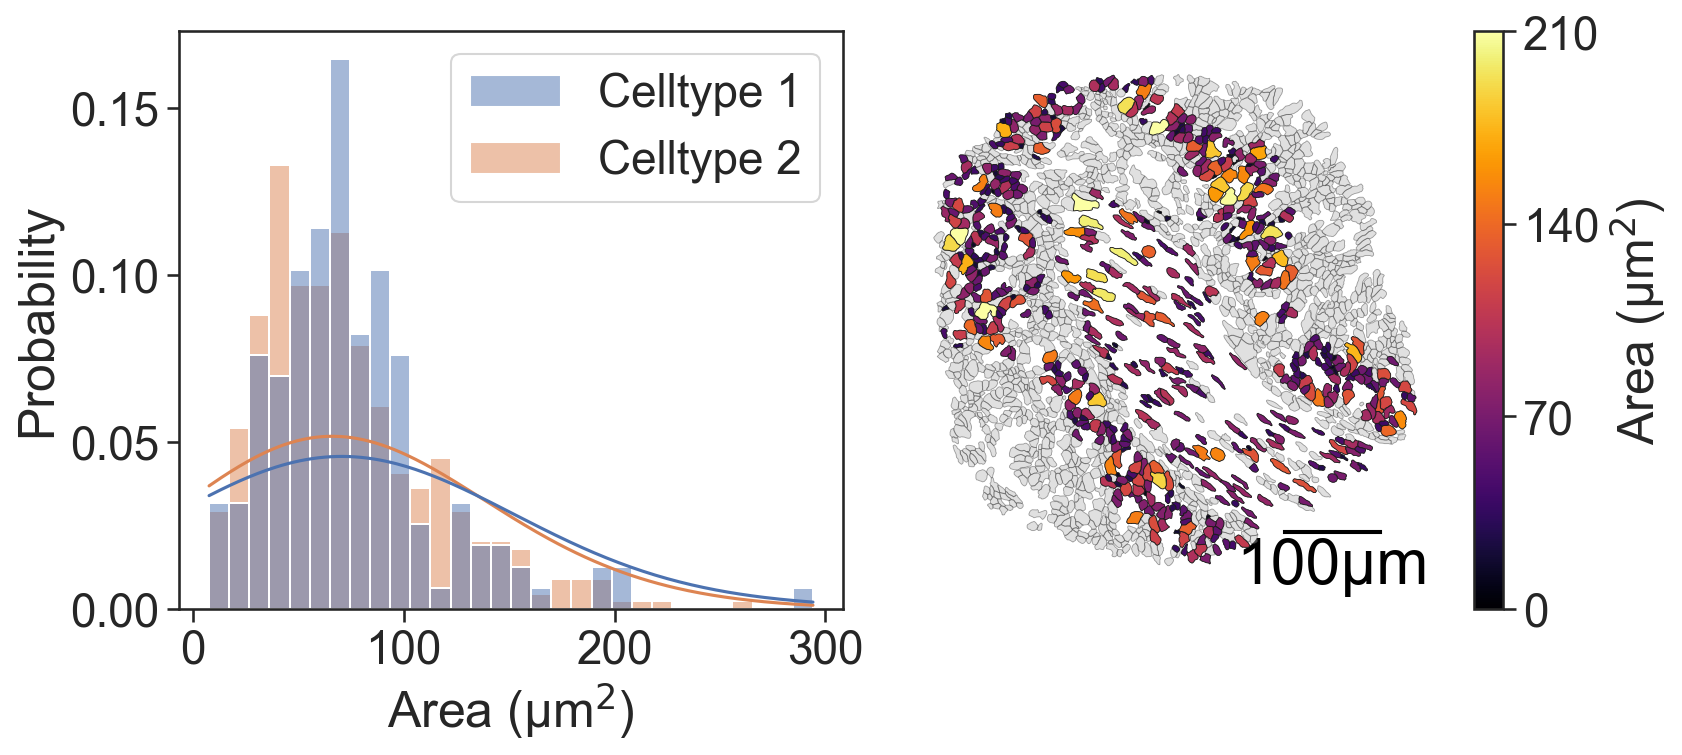

In [72]:
# Create a figure with 2 subplots arranged in a single row
fig, ax = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.1})

# Plot a histogram of the cell areas for the cells
sns.histplot(x=this_area, hue=group_labels_simple, fill=True, ax=ax[0], kde=True, kde_kws={'bw_adjust': 5, 'clip': [0, np.infty]}, legend=True, bins=30, stat='probability', common_norm=False)

# Set the axis labels for the histogram
ax[0].set_xlabel("Area (µm$^2$)")
ax[0].set_ylabel("Probability")

# Visualize the domain with cell boundaries and transcripts
ms.visualise.visualise(domain_1, color_by=('label', 'Transcript ID'), objects_to_plot=qCells, ax=ax[1], add_cbar=False, shape_kwargs={'alpha': 0.4, 'linewidth': 0.4})

# Visualize the domain with cell areas
ms.visualise.visualise(domain_1, color_by=('label', 'Area (µm$^2$)'), objects_to_plot=cluster_of_interest_query, ax=ax[1], add_cbar=True, vmin=0, vmax=210, shape_kwargs={'linewidth': 0.4, 'alpha': 1},
                       add_scalebar=True, scalebar_kwargs={'size': 100, 'label': '100µm', 'loc': 'lower right', 'pad': 0.1, 'color': 'black', 'frameon': False, 'size_vertical': 2, 'fontproperties': fm.FontProperties(size=30)})